# Preliminary operations

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/MyDrive/Homework1
#%cd /gdrive/MyDrive

/gdrive/MyDrive/Homework1


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# !pip install visualkeras
# import visualkeras

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

2.9.2


# Common definitions

In [ ]:
aug_generator = ImageDataGenerator(rotation_range=180,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    brightness_range=[0.6,1.4],
                                    fill_mode='reflect',
                                    horizontal_flip=False,
                                    vertical_flip=False,
                                    #rescale=1/255.,
                                    preprocessing_function=None, #Included in the NN
                                   )

In [ ]:
def define_generators(directory, bs, aug_gen):

  generators = {}
  training_dir = os.path.join(directory, 'train') 
  validation_dir = os.path.join(directory, 'val') 
  test_dir = os.path.join(directory, 'test') 

  generators['train'] = aug_gen.flow_from_directory(directory=training_dir,
                                                        target_size=(96,96),
                                                        color_mode='rgb',
                                                        classes=None,
                                                        class_mode='categorical',
                                                        batch_size=bs,
                                                        shuffle=True,
                                                        seed=seed)


  # VALIDATION SET
  generators['val'] = ImageDataGenerator(#rescale=1/255.
                                         ).flow_from_directory(directory=validation_dir,
                                                target_size=(96,96),
                                                color_mode='rgb',
                                                classes=None,
                                                class_mode='categorical',
                                                batch_size=bs,
                                                shuffle=False,
                                                seed=seed)

  # TEST SET
  generators['test'] = ImageDataGenerator(#rescale=1/255.
                                          ).flow_from_directory(directory=test_dir,
                                                target_size=(96,96),
                                                color_mode='rgb',
                                                classes=None,
                                                class_mode='categorical',
                                                batch_size=bs,
                                                shuffle=False,
                                                seed=seed)

  return generators

In [ ]:
labels = {
    0:'Species1', 
    1:'Species2', 
    2:'Species3', 
    3:'Species4', 
    4:'Species5', 
    5:'Species6',
    6:'Species7', 
    7:'Species8'}

In [ ]:
input_shape = (96, 96, 3)
output_dim = 8
epochs = 200
mtrcs = ['accuracy']
monmtr = 'val_accuracy'

In [ ]:
def evaluate_model(model_name, test_set, target):
  model = tfk.models.load_model(model_name)
  predictions = model.predict(test_set)
  metrics= {
    "model": model_name,
    "predictions" : predictions,
    "target": target,
    "cm": confusion_matrix(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), normalize='true', ),
    "accuracy" : accuracy_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1)),
    "precision" : precision_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro'),
    "recall" : recall_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro'),
    "f1" : f1_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro')  }
  
  print("Model: "+ str(metrics["model"]))
  print("Accuracy: "+ str(metrics["accuracy"]))
  print("F1 score: "+ str(metrics["f1"]))
  cm = metrics["cm"]
  plt.figure(figsize=(10,8))
  sns.heatmap(cm.T, annot=True, fmt='.2f', xticklabels=list(labels.values()), yticklabels=list(labels.values()))
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()

  return metrics

In [ ]:
def evaluate_model_m(model, test_set, target):
  predictions = model.predict(test_set)
  metrics= {
    "predictions" : predictions,
    "target": target,
    "cm": confusion_matrix(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), normalize='true', ),
    "accuracy" : accuracy_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1)),
    "precision" : precision_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro'),
    "recall" : recall_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro'),
    "f1" : f1_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro')  }
  
  print("Accuracy: "+ str(metrics["accuracy"]))
  print("F1 score: "+ str(metrics["f1"]))
  cm = metrics["cm"]
  plt.figure(figsize=(10,8))
  sns.heatmap(cm.T, annot=True, fmt='.2f', xticklabels=list(labels.values()), yticklabels=list(labels.values()))
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()

  return metrics

# Load pre-trained models

In [ ]:
EffNet_Mat_1 = tfk.models.load_model('models/FT_EFFNETS_85')

In [ ]:
EffNet_Mat_2 = tfk.models.load_model('models/FT_EFFNETS_88')

In [ ]:
VGG_Chia = tfk.models.load_model('models/VGG_6++')

In [ ]:
VGG_Fra = tfk.models.load_model('models/VGG_FT5')

# ---------------

In [ ]:
models = [EffNet_Mat_1, EffNet_Mat_2, VGG_Chia]
#models = [EffNet_Mat_1, EffNet_Mat_2, VGG_Fra]

NameError: ignored

In [ ]:
dataset_dir = "dataset_homework1"
bs = 32

In [ ]:
gens = define_generators(dataset_dir, bs, aug_generator)

train_gen = gens['train']
valid_gen = gens['val']
test_gen = gens['test']

train_target = train_gen.classes
val_target = valid_gen.classes
test_target = test_gen.classes

train_target_cat = tfk.utils.to_categorical(train_gen.classes)
val_target_cat = tfk.utils.to_categorical(valid_gen.classes)
test_target_cat = tfk.utils.to_categorical(test_gen.classes)

Found 2829 images belonging to 8 classes.
Found 351 images belonging to 8 classes.
Found 362 images belonging to 8 classes.


In [ ]:
from sklearn.utils import compute_class_weight

train_classes= train_gen.classes
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_classes),
                                        y = train_classes                                                    
                                    )
class_weights = dict(zip(np.unique(train_classes), class_weights))
class_weights

# Traditional

In [ ]:
def ensemble_traditional(models, input_shape):
  input_layer = tfk.Input(shape=input_shape)
  model_outputs=[]
  for i in range(len(models)):
    model=models[i]
    model._name="model" + str(i) 
    model_outputs.append(model(input_layer))

  ensemble_output = tfkl.Average()(model_outputs)
  ensemble_model = tf.keras.Model(inputs=input_layer, outputs=ensemble_output)
    
  return ensemble_model 

In [ ]:
model = ensemble_traditional(models,input_shape) 

In [ ]:
model.save("models/Ensemble_trad_1")

6/6 [==============================] - 1s 160ms/step
Accuracy: 0.8917378917378918
F1 score: 0.8630025252323859


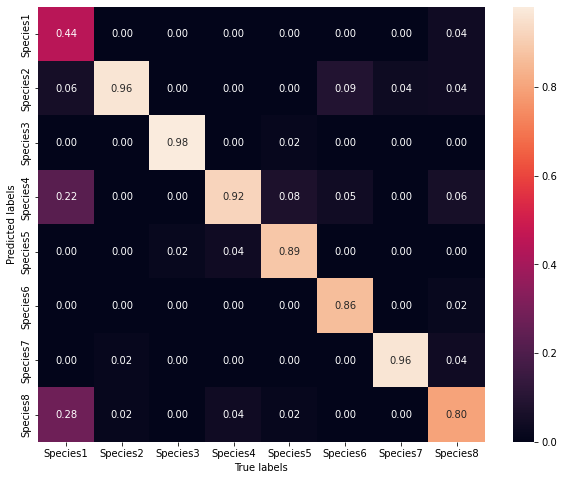

In [ ]:
ret = evaluate_model_m(model,valid_gen, val_target_cat)

6/6 [==============================] - 97s 19s/step
Accuracy: 0.8839779005524862
F1 score: 0.8787225454322558


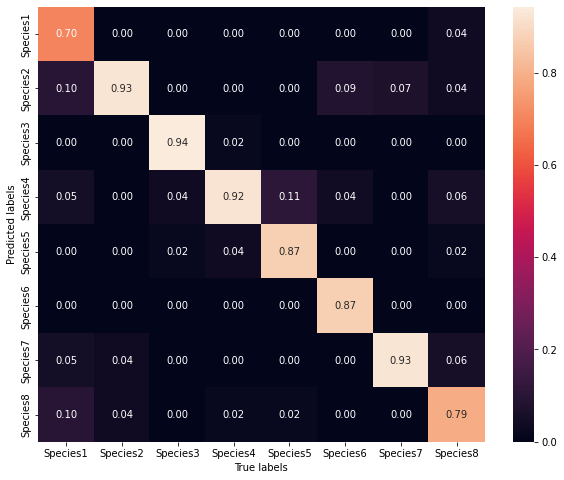

In [ ]:
ret = evaluate_model_m(model,test_gen, test_target_cat)

#Dense

In [ ]:
def ensemble_dense(models):

  """ Add a dense layer after concatenation of models' outputs in the ensemble"""
  
  input_layer = tfk.Input(shape=input_shape)
  model_outputs=[]
  for i in range(len(models)):
    model=models[i]
    model._name="model" + str(i) 
    model_outputs.append(model(input_layer))

  ensemble_output = tfkl.Concatenate()(model_outputs)
  ensemble_model = tf.keras.Model(inputs=input_layer, outputs=ensemble_output)

  ensemble_model.trainable = False

  input = tfk.Input(shape=(96,96,3))

  x = ensemble_model(input)
  
  output = tfkl.Dense(
      8, 
      name='Output_layer',
      activation='softmax',
      kernel_initializer = tfk.initializers.GlorotUniform(seed),
      )(x) 
  

  model = tfk.Model(inputs=input, outputs=output, name='model')

  lr = 1e-1

  model.compile(loss=tfk.losses.CategoricalCrossentropy, optimizer=tfk.optimizers.Adam(lr), metrics='accuracy')

  return model

In [ ]:
model = ensemble_dense(models)

In [ ]:
model.summary()

In [ ]:
history = model.fit(
    x = train_gen,
    epochs = 50,
    class_weight = class_weights,
    batch_size = bs, 
    validation_data = valid_gen,
    callbacks=[
        tfk.callbacks.EarlyStopping(monitor=monmtr, patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor=monmtr, patience=3, factor=0.5, min_lr=1e-8),
    ] 
).history

In [ ]:
model.save("models/Ensemble_dense")

In [ ]:
mt = model.evaluate(train_gen, return_dict=True)
mv = model.evaluate(valid_gen, return_dict=True)

print("Accuracy: ")
print("     (Train) ", mt['accuracy'])
print("     (Valid) ", mv['accuracy'])

In [ ]:
ret = evaluate_model("models/Ensemble_dense",test_gen, test_target_cat)

#Convolutional

In [ ]:
def ensemble_conv(input_shape, EffNet_Mat_1, EffNet_Mat_2, VGG_Chia, lr):
  
  """ Instead of a dense layer we use Conv"""

  
  input_layer = tfk.Input(shape=input_shape)

  EffNet_Mat_1._name= "EffNet_Mat_1"
  EffNet_Mat_1.trainable = False
  out1 = EffNet_Mat_1(input_layer)
  out1 = tf.keras.layers.Reshape((8,1,1))(out1)
  
  EffNet_Mat_2._name= "EffNet_Mat_2"
  EffNet_Mat_2.trainable = False
  out2 = EffNet_Mat_2(input_layer)
  out2 = tf.keras.layers.Reshape((8,1,1))(out2)
  
  VGG_Chia._name= "VGG_Chia"
  VGG_Chia.trainable = False
  out3 = VGG_Chia(input_layer)
  out3 = tf.keras.layers.Reshape((8,1,1))(out3)

  out = tfkl.Concatenate(axis=3)([out1,out2])
  out = tfkl.Concatenate(axis=3)([out,out3])
  out = tfkl.Conv1D(filters=1,kernel_size=1, strides=1, activation=None, padding = 'same', use_bias=False)(out)
  out = tfk.layers.Flatten()(out)

  ensemble_model = tfk.Model(inputs=input_layer, outputs=out)

  ensemble_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=lr), metrics=mtrcs)
  
  return ensemble_model 

In [ ]:
model = ensemble_conv(input_shape, EffNet_Mat_1, EffNet_Mat_2, VGG_Chia,1e-2)

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 EffNet_Mat_1 (Functional)      (None, 8)            20991336    ['input_7[0][0]']                
                                                                                                  
 EffNet_Mat_2 (Functional)      (None, 8)            20785096    ['input_7[0][0]']                
                                                                                                  
 reshape_15 (Reshape)           (None, 8, 1, 1)      0           ['EffNet_Mat_1[5][0]']           
                                                                                            

In [ ]:
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=1e-2), metrics=mtrcs)

In [ ]:
history = model.fit(
    x = train_gen,
    epochs = 50,
    class_weight = class_weights,
    batch_size = bs, 
    validation_data = valid_gen,
    callbacks=[
        tfk.callbacks.EarlyStopping(monitor=monmtr, patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor=monmtr, patience=3, factor=0.5, min_lr=1e-8),
    ] 
).history

Epoch 1/50
45/45 [==============================] - 50s 571ms/step - loss: 4.1628 - accuracy: 0.8710 - val_loss: 4.6261 - val_accuracy: 0.8091 - lr: 0.0100
Epoch 2/50
45/45 [==============================] - 18s 403ms/step - loss: 3.3349 - accuracy: 0.9212 - val_loss: 3.5926 - val_accuracy: 0.8148 - lr: 0.0100
Epoch 3/50
45/45 [==============================] - 17s 367ms/step - loss: 3.1696 - accuracy: 0.9279 - val_loss: 3.4580 - val_accuracy: 0.8177 - lr: 0.0100
Epoch 4/50
45/45 [==============================] - 19s 414ms/step - loss: 3.1217 - accuracy: 0.9346 - val_loss: 3.4535 - val_accuracy: 0.8234 - lr: 0.0100
Epoch 5/50
45/45 [==============================] - 16s 346ms/step - loss: 3.1152 - accuracy: 0.9396 - val_loss: 3.4280 - val_accuracy: 0.8234 - lr: 0.0100
Epoch 6/50
45/45 [==============================] - 16s 345ms/step - loss: 3.1187 - accuracy: 0.9325 - val_loss: 3.3613 - val_accuracy: 0.8205 - lr: 0.0100
Epoch 7/50
45/45 [==============================] - 16s 359ms/st

In [ ]:
model.save("models/Ensemble_conv_1")

In [ ]:
mt = model.evaluate(train_gen, return_dict=True)
mv = model.evaluate(valid_gen, return_dict=True)

print("Accuracy: ")
print("     (Train) ", mt['accuracy'])
print("     (Valid) ", mv['accuracy'])

6/6 [==============================] - 1s 177ms/step - loss: 3.3261 - accuracy: 0.8319
Accuracy: 
     (Train)  0.95652174949646
     (Valid)  0.8319088220596313


6/6 [==============================] - 20s 710ms/step
Model: models/Ensemble_conv_1
Accuracy: 0.856353591160221
F1 score: 0.8447040728272113


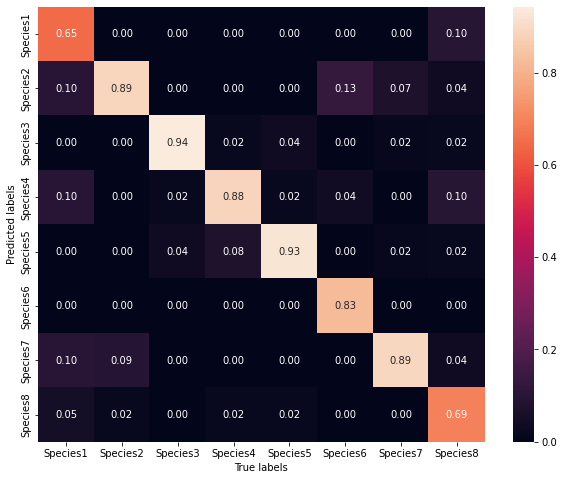

In [ ]:
ret = evaluate_model("models/Ensemble_conv_1",test_gen, test_target_cat)

# Convolutional reg
L1L2 (lambda = 0.001)

In [ ]:
def ensemble_conv_reg(input_shape, EffNet_Mat_1, EffNet_Mat_2, VGG_Chia, lr, elastic_lambda):
  input_layer = tfk.Input(shape=input_shape)

  EffNet_Mat_1._name= "EffNet_Mat_1"
  EffNet_Mat_1.trainable = False
  out1 = EffNet_Mat_1(input_layer)
  out1 = tf.keras.layers.Reshape((8,1,1))(out1)
  
  EffNet_Mat_2._name= "EffNet_Mat_2"
  EffNet_Mat_2.trainable = False
  out2 = EffNet_Mat_2(input_layer)
  out2 = tf.keras.layers.Reshape((8,1,1))(out2)
  
  VGG_Chia._name= "VGG_Chia"
  VGG_Chia.trainable = False
  out3 = VGG_Chia(input_layer)
  out3 = tf.keras.layers.Reshape((8,1,1))(out3)

  out = tfkl.Concatenate(axis=3)([out1,out2])
  out = tfkl.Concatenate(axis=3)([out,out3])

  out = tfkl.Conv1D(filters=1,
                    kernel_size=1, strides=1, 
                    activation=None, 
                    padding = 'same', 
                    kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda),
                    use_bias=False)(out)

  out = tfk.layers.Flatten()(out)

  ensemble_model = tfk.Model(inputs=input_layer, outputs=out)

  ensemble_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=lr), metrics=mtrcs)
  
  return ensemble_model 

In [ ]:
lr = 1e-2
elastic_lambda = 1e-3
model = ensemble_conv_reg(input_shape, EffNet_Mat_1, EffNet_Mat_2, VGG_Chia, lr, elastic_lambda)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 EffNet_Mat_1 (Functional)      (None, 8)            20991336    ['input_1[0][0]']                
                                                                                                  
 EffNet_Mat_2 (Functional)      (None, 8)            20785096    ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 8, 1, 1)      0           ['EffNet_Mat_1[0][0]']           
                                                                                              

In [ ]:
bm = tfk.models.load_model("models/Ensemble_conv_1")

In [ ]:
bm.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 EffNet_Mat_1 (Functional)      (None, 8)            20991336    ['input_7[0][0]']                
                                                                                                  
 EffNet_Mat_2 (Functional)      (None, 8)            20785096    ['input_7[0][0]']                
                                                                                                  
 reshape_15 (Reshape)           (None, 8, 1, 1)      0           ['EffNet_Mat_1[0][0]']           
                                                                                            

In [ ]:
model.get_layer("conv1d").set_weights(bm.get_layer("conv1d_5").get_weights())
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=lr), metrics=mtrcs)

In [ ]:
del bm

In [ ]:
del EffNet_Mat_1
del EffNet_Mat_2
del VGG_Chia

In [ ]:
history = model.fit(
    x = train_gen,
    epochs = 50,
    class_weight = class_weights,
    batch_size = bs, 
    validation_data = valid_gen,
    callbacks=[
        tfk.callbacks.EarlyStopping(monitor=monmtr, patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor=monmtr, patience=3, factor=0.5, min_lr=1e-8),
    ] 
).history

Epoch 1/50
89/89 [==============================] - 681s 7s/step - loss: 3.0926 - accuracy: 0.9487 - val_loss: 3.3107 - val_accuracy: 0.8519 - lr: 0.0100
Epoch 2/50
89/89 [==============================] - 19s 210ms/step - loss: 3.0974 - accuracy: 0.9480 - val_loss: 3.3134 - val_accuracy: 0.8604 - lr: 0.0100
Epoch 3/50
89/89 [==============================] - 18s 202ms/step - loss: 3.1003 - accuracy: 0.9445 - val_loss: 3.3086 - val_accuracy: 0.8604 - lr: 0.0100
Epoch 4/50
89/89 [==============================] - 18s 202ms/step - loss: 3.0830 - accuracy: 0.9537 - val_loss: 3.3099 - val_accuracy: 0.8604 - lr: 0.0100
Epoch 5/50
89/89 [==============================] - 18s 202ms/step - loss: 3.0907 - accuracy: 0.9519 - val_loss: 3.3128 - val_accuracy: 0.8604 - lr: 0.0100
Epoch 6/50
89/89 [==============================] - 18s 202ms/step - loss: 3.1055 - accuracy: 0.9466 - val_loss: 3.3113 - val_accuracy: 0.8604 - lr: 0.0050
Epoch 7/50
89/89 [==============================] - 18s 205ms/step

In [ ]:
model.save("models/Ensemble_conv_2")

In [ ]:
mt = model.evaluate(train_gen, return_dict=True)
mv = model.evaluate(valid_gen, return_dict=True)

print("Accuracy: ")
print("     (Train) ", mt['accuracy'])
print("     (Valid) ", mv['accuracy'])

11/11 [==============================] - 2s 149ms/step - loss: 3.3134 - accuracy: 0.8604
Accuracy: 
     (Train)  0.9604100584983826
     (Valid)  0.8603988885879517


12/12 [==============================] - 74s 6s/step
Accuracy: 0.8729281767955801
F1 score: 0.8715815830020411


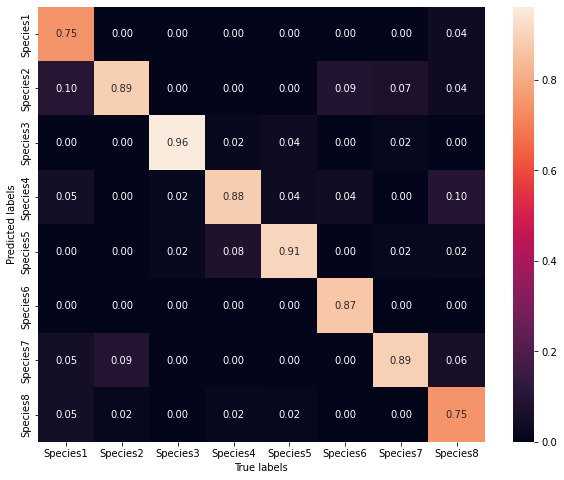

In [ ]:
ret = evaluate_model_m(model,test_gen, test_target_cat)

In [ ]:
%who

Image	 ImageDataGenerator	 accuracy_score	 aug_generator	 bs	 class_weights	 compute_class_weight	 confusion_matrix	 dataset_dir	 
define_generators	 drive	 elastic_lambda	 ensemble_conv_reg	 epochs	 evaluate_model	 evaluate_model_m	 f1_score	 gens	 
history	 input_shape	 labels	 lr	 model	 monmtr	 mpl	 mt	 mtrcs	 
mv	 np	 os	 output_dim	 pd	 plt	 precision_score	 random	 recall_score	 
ret	 seed	 sns	 test_gen	 test_target	 test_target_cat	 tf	 tfk	 tfkl	 
train_classes	 train_gen	 train_target	 train_target_cat	 train_test_split	 val_target	 val_target_cat	 valid_gen	 


# Convolutional reg
L1L2 (lambda = 0.01)

In [ ]:
def ensemble_conv_reg(input_shape, EffNet_Mat_1, EffNet_Mat_2, VGG_Chia, lr, elastic_lambda):
  input_layer = tfk.Input(shape=input_shape)

  EffNet_Mat_1._name= "EffNet_Mat_1"
  EffNet_Mat_1.trainable = False
  out1 = EffNet_Mat_1(input_layer)
  out1 = tf.keras.layers.Reshape((8,1,1))(out1)
  
  EffNet_Mat_2._name= "EffNet_Mat_2"
  EffNet_Mat_2.trainable = False
  out2 = EffNet_Mat_2(input_layer)
  out2 = tf.keras.layers.Reshape((8,1,1))(out2)
  
  VGG_Chia._name= "VGG_Chia"
  VGG_Chia.trainable = False
  out3 = VGG_Chia(input_layer)
  out3 = tf.keras.layers.Reshape((8,1,1))(out3)

  out = tfkl.Concatenate(axis=3)([out1,out2])
  out = tfkl.Concatenate(axis=3)([out,out3])

  out = tfkl.Conv1D(filters=1,
                    kernel_size=1, strides=1, 
                    activation=None, 
                    padding = 'same', 
                    kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda),
                    use_bias=False)(out)

  out = tfk.layers.Flatten()(out)

  ensemble_model = tfk.Model(inputs=input_layer, outputs=out)

  ensemble_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=lr), metrics=mtrcs)
  
  return ensemble_model 

In [ ]:
lr = 1e-2
elastic_lambda = 1e-2
model = ensemble_conv_reg(input_shape, EffNet_Mat_1, EffNet_Mat_2, VGG_Chia, lr, elastic_lambda)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 EffNet_Mat_1 (Functional)      (None, 8)            20991336    ['input_1[0][0]']                
                                                                                                  
 EffNet_Mat_2 (Functional)      (None, 8)            20785096    ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 8, 1, 1)      0           ['EffNet_Mat_1[0][0]']           
                                                                                              

In [ ]:
bm = tfk.models.load_model("models/Ensemble_conv_1")

In [ ]:
bm.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 EffNet_Mat_1 (Functional)      (None, 8)            20991336    ['input_7[0][0]']                
                                                                                                  
 EffNet_Mat_2 (Functional)      (None, 8)            20785096    ['input_7[0][0]']                
                                                                                                  
 reshape_15 (Reshape)           (None, 8, 1, 1)      0           ['EffNet_Mat_1[0][0]']           
                                                                                            

In [ ]:
model.get_layer("conv1d").set_weights(bm.get_layer("conv1d_5").get_weights())

In [ ]:
del bm
del EffNet_Mat_1
del EffNet_Mat_2
del VGG_Chia

In [ ]:
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=lr), metrics=mtrcs)

In [ ]:
history = model.fit(
    x = train_gen,
    epochs = 20,
    class_weight = class_weights,
    batch_size = bs, 
    validation_data = valid_gen,
    callbacks=[
        tfk.callbacks.EarlyStopping(monitor=monmtr, patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor=monmtr, patience=3, factor=0.5, min_lr=1e-8),
    ] 
).history

Epoch 1/20
89/89 [==============================] - 1546s 17s/step - loss: 3.1223 - accuracy: 0.9445 - val_loss: 3.3320 - val_accuracy: 0.8462 - lr: 0.0100
Epoch 2/20
89/89 [==============================] - 17s 191ms/step - loss: 3.1048 - accuracy: 0.9463 - val_loss: 3.3195 - val_accuracy: 0.8775 - lr: 0.0100
Epoch 3/20
89/89 [==============================] - 16s 183ms/step - loss: 3.1053 - accuracy: 0.9406 - val_loss: 3.3108 - val_accuracy: 0.8632 - lr: 0.0100
Epoch 4/20
89/89 [==============================] - 17s 185ms/step - loss: 3.0861 - accuracy: 0.9530 - val_loss: 3.3131 - val_accuracy: 0.8519 - lr: 0.0100
Epoch 5/20
89/89 [==============================] - 16s 184ms/step - loss: 3.0955 - accuracy: 0.9509 - val_loss: 3.3121 - val_accuracy: 0.8604 - lr: 0.0100
Epoch 6/20
89/89 [==============================] - 16s 183ms/step - loss: 3.1084 - accuracy: 0.9473 - val_loss: 3.3064 - val_accuracy: 0.8632 - lr: 0.0050
Epoch 7/20
89/89 [==============================] - 17s 186ms/st

In [ ]:
mt = model.evaluate(train_gen, return_dict=True)
mv = model.evaluate(valid_gen, return_dict=True)

print("Accuracy: ")
print("     (Train) ", mt['accuracy'])
print("     (Valid) ", mv['accuracy'])

11/11 [==============================] - 2s 128ms/step - loss: 3.3195 - accuracy: 0.8775
Accuracy: 
     (Train)  0.9650052785873413
     (Valid)  0.8774929046630859


12/12 [==============================] - 188s 17s/step
Accuracy: 0.8895027624309392
F1 score: 0.8876144247256985


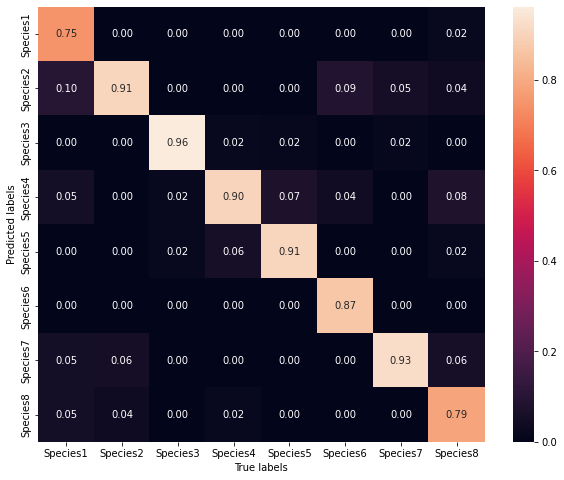

In [ ]:
ret = evaluate_model_m(model,test_gen, test_target_cat)

In [ ]:
%who

accuracy_score	 aug_generator	 bs	 class_weights	 compute_class_weight	 confusion_matrix	 dataset_dir	 define_generators	 drive	 
elastic_lambda	 ensemble_conv_reg	 epochs	 evaluate_model	 evaluate_model_m	 f1_score	 input_shape	 labels	 lr	 
model	 monmtr	 mpl	 mt	 mtrcs	 mv	 np	 os	 output_dim	 
pd	 plt	 precision_score	 random	 recall_score	 ret	 seed	 sns	 test_target	 
test_target_cat	 tf	 tfk	 tfkl	 train_classes	 train_target	 train_target_cat	 train_test_split	 val_target	 
val_target_cat	 


In [ ]:
del ImageDataGenerator
del test_gen
del train_gen
del valid_gen
del history
del Image
del gens

In [ ]:
del accuracy_score
del aug_generator	 
del compute_class_weight	 
del class_weights	 
del confusion_matrix	 
del dataset_dir
del define_generators	 
del ensemble_conv_reg	 
del test_target_cat	 
del train_target_cat	 

In [ ]:
model.save("models/Ensemble_conv_3")

# Convolutional extended

In [ ]:
def ensemble_conv_ext(input_shape, EffNet_Mat_1, EffNet_Mat_2, VGG_Chia, lr):
  input_layer = tfk.Input(shape=input_shape)

  EffNet_Mat_1._name= "EffNet_Mat_1"
  EffNet_Mat_1.trainable = False 
  out1 = EffNet_Mat_1(input_layer)
  out1 = tf.keras.layers.Reshape((8,1,1))(out1)
  
  EffNet_Mat_2._name= "EffNet_Mat_2"
  EffNet_Mat_2.trainable = False
  out2 = EffNet_Mat_2(input_layer)
  out2 = tf.keras.layers.Reshape((8,1,1))(out2)
  
  VGG_Chia._name= "VGG_Chia"
  VGG_Chia.trainable = False
  out3 = VGG_Chia(input_layer)
  out3 = tf.keras.layers.Reshape((8,1,1))(out3)

  out = tfkl.Concatenate(axis=3)([out1,out2])
  out = tfkl.Concatenate(axis=3)([out,out3])
  out = tfkl.Conv1D(filters=8,kernel_size=1, strides=1, activation='relu', padding = 'same', use_bias=False)(out)
  out = tfkl.Conv1D(filters=1,kernel_size=1, strides=1, activation='relu', padding = 'same', use_bias=False)(out)
  out = tfkl.Flatten()(out)

  ensemble_model = tfk.Model(inputs=input_layer, outputs=out)

  ensemble_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=lr), metrics=mtrcs)
  
  return ensemble_model 

In [ ]:
model = ensemble_conv_ext(input_shape, EffNet_Mat_1, EffNet_Mat_2, VGG_Chia, 1e-2)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 EffNet_Mat_1 (Functional)      (None, 8)            20991336    ['input_5[0][0]']                
                                                                                                  
 EffNet_Mat_2 (Functional)      (None, 8)            20785096    ['input_5[0][0]']                
                                                                                                  
 reshape_12 (Reshape)           (None, 8, 1, 1)      0           ['EffNet_Mat_1[4][0]']           
                                                                                            

In [ ]:
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=1e-2), metrics=mtrcs)

In [ ]:
history = model.fit(
    x = train_gen,
    epochs = 50,
    class_weight = class_weights,
    batch_size = bs, 
    validation_data = valid_gen,
    callbacks=[
        tfk.callbacks.EarlyStopping(monitor=monmtr, patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor=monmtr, patience=3, factor=0.5, min_lr=1e-8),
    ] 
).history

Epoch 1/50
89/89 [==============================] - 1029s 11s/step - loss: 3.3330 - accuracy: 0.9074 - val_loss: 3.2812 - val_accuracy: 0.8917 - lr: 0.0100
Epoch 2/50
89/89 [==============================] - 19s 209ms/step - loss: 3.1060 - accuracy: 0.9403 - val_loss: 3.2835 - val_accuracy: 0.8946 - lr: 0.0100
Epoch 3/50
89/89 [==============================] - 20s 222ms/step - loss: 3.0888 - accuracy: 0.9417 - val_loss: 3.2918 - val_accuracy: 0.8917 - lr: 0.0100
Epoch 4/50
89/89 [==============================] - 18s 204ms/step - loss: 3.0591 - accuracy: 0.9509 - val_loss: 3.3136 - val_accuracy: 0.8917 - lr: 0.0100
Epoch 5/50
89/89 [==============================] - 18s 204ms/step - loss: 3.0673 - accuracy: 0.9480 - val_loss: 3.3002 - val_accuracy: 0.8889 - lr: 0.0100
Epoch 6/50
89/89 [==============================] - 18s 204ms/step - loss: 3.0753 - accuracy: 0.9463 - val_loss: 3.3059 - val_accuracy: 0.8889 - lr: 0.0050
Epoch 7/50
89/89 [==============================] - 18s 207ms/st

In [ ]:
model.save("models/Ensemble_conv_4")

In [ ]:
mt = model.evaluate(train_gen, return_dict=True)
mv = model.evaluate(valid_gen, return_dict=True)

print("Accuracy: ")
print("     (Train) ", mt['accuracy'])
print("     (Valid) ", mv['accuracy'])

11/11 [==============================] - 2s 131ms/step - loss: 3.2835 - accuracy: 0.8946
Accuracy: 
     (Train)  0.9589961171150208
     (Valid)  0.8945869207382202


12/12 [==============================] - 17s 190ms/step
Model: models/Ensemble_conv_4
Accuracy: 0.8867403314917127
F1 score: 0.8807401444511374


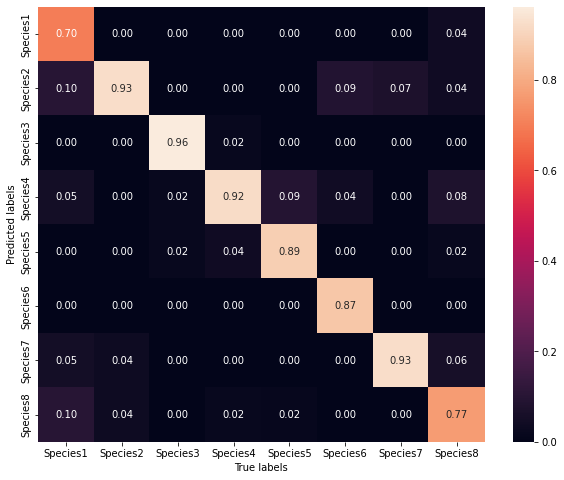

In [ ]:
ret = evaluate_model("models/Ensemble_conv_4",test_gen, test_target_cat)

#Weighted ensemble

In [ ]:
class WeightedAverageLayer(tfkl.Layer):
    def __init__(self, w1, w2, **kwargs):
        super(WeightedAverageLayer, self).__init__(**kwargs)
        self.w1 = w1
        self.w2 = w2

    def call(self, inputs):
        return self.w1 * inputs[0] + self.w2 * inputs[1]

In [ ]:
class WeightedAverageLayer3(tfkl.Layer):
    def __init__(self, w1, w2, w3, **kwargs):
        super(WeightedAverageLayer, self).__init__(**kwargs)
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3

    def call(self, inputs):
        return self.w1 * inputs[0] + self.w2 * inputs[1] + self.w3 * inputs[2]

In [ ]:
def WeightedEnsemble(models, model_input,weights):
    
    model_outputs=[]
    for i in range(len(models)):
      model=models[i]
      model._name="model" + str(i)
      model_outputs.append(model(model_input))
    
    ensemble_output = WeightedAverageLayer(weights[0],weights[1])(model_outputs)
    ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)
    
    return ensemble_model

In [ ]:
def WeightedEnsemble3(models, model_input,weights):
    
    model_outputs=[]
    for i in range(len(models)):
      model=models[i]
      model._name="model" + str(i)
      model_outputs.append(model(model_input))
    
    ensemble_output = WeightedAverageLayer3(weights[0],weights[1],weights[2])(model_outputs)
    ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)
    
    return ensemble_model

## Weighted (0.8895)
0.6 effnet88 e 0.4 vgg

In [ ]:
inputs = tfk.Input(shape=(96,96,3))
models = [EffNet_Mat_2, VGG_Fra]
model=WeightedEnsemble(models,inputs,[0.6,0.4])

46/46 [==============================] - 63s 1s/step
Accuracy: 0.8895
Precision: 0.8999
Recall: 0.8769
F1: 0.8861


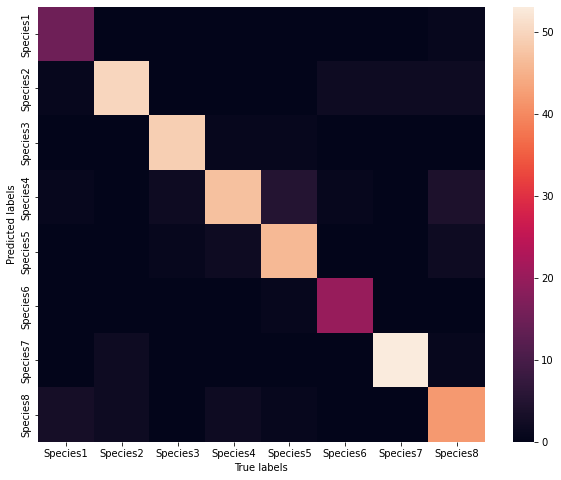

In [ ]:
# Predict the test set with the CNN
predictions = model.predict(test_gen)
predictions.shape

pred=np.argmax(predictions,axis=1)
# Compute the confusion matrix
cm = confusion_matrix(test_gen.classes, pred)

pred=np.argmax(predictions,axis=-1)

# Compute the classification metrics
accuracy = accuracy_score(test_gen.classes, pred)
precision = precision_score(test_gen.classes, pred, average='macro')
recall = recall_score(test_gen.classes, pred, average='macro')
f1 = f1_score(test_gen.classes, pred, average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, xticklabels=labels, yticklabels=labels)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

## Weighted
EFFNET88 E EFFNET85 E VGGCHIA

In [ ]:
inputs = tfk.Input(shape=(96,96,3))
models = [EffNet_Mat_2, EffNet_Mat_1, VGG_Chia]
model=WeightedEnsemble(models,inputs,[88/254,85/254,81/254])

46/46 [==============================] - 34s 551ms/step
Accuracy: 0.8785
Precision: 0.8724
Recall: 0.8659
F1: 0.8676


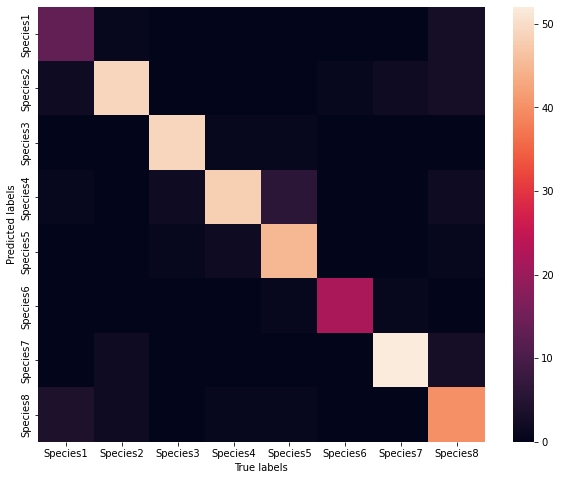

In [ ]:
# Predict the test set with the CNN
predictions = model.predict(test_gen)
predictions.shape

pred=np.argmax(predictions,axis=1)
# Compute the confusion matrix
cm = confusion_matrix(test_gen.classes, pred)

pred=np.argmax(predictions,axis=-1)

# Compute the classification metrics
accuracy = accuracy_score(test_gen.classes, pred)
precision = precision_score(test_gen.classes, pred, average='macro')
recall = recall_score(test_gen.classes, pred, average='macro')
f1 = f1_score(test_gen.classes, pred, average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, xticklabels=labels, yticklabels=labels)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

# Final Evaluation

In [ ]:
!ls models

densenet_1			Ensemble_conv_1  VGG_6
densenet_1_finetuned		Ensemble_conv_2  VGG_6++
efficient_hyper			Ensemble_conv_3  VGG_6+++
efficient_hyper_1		ensemble_top	 VGG_7+
efficient_hyper2		Ensemble_trad_1  VGG_7+++
efficient_hyper_FT		FT_EFFNETS_85	 VGG_balanced_1
efficient_hyper_FT_more_layer2	FT_EFFNETS_88	 VGG_classweights_1
Eff_Net_1			Trad_CNN_0	 VGG_classweights_1_finetuned
Eff_Net_2			VGG_0		 VGG_FT5


12/12 [==============================] - 58s 4s/step
Model: models/Ensemble_conv_2
Accuracy: 0.8784530386740331
F1 score: 0.8741536071632348


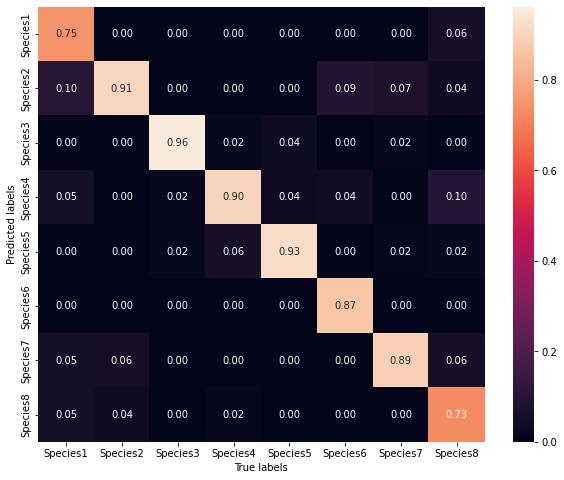

In [ ]:
ret = evaluate_model("models/Ensemble_conv_2", test_gen, test_target_cat)

12/12 [==============================] - 7s 111ms/step
Model: models/Ensemble_conv_3
Accuracy: 0.8895027624309392
F1 score: 0.8877327809881618


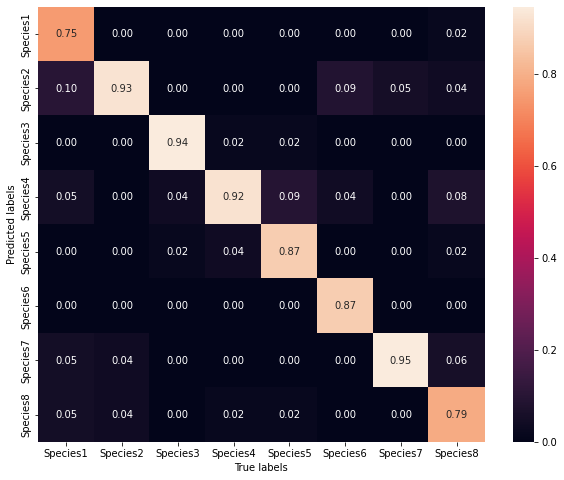

In [ ]:
ret = evaluate_model("models/Ensemble_conv_3", test_gen, test_target_cat)